# CMU Movies Summary Corpus

- Authors: Zaynab, Lylia, Ali, Christian, Yassin

---

## Tasks

1. **Select Project & Initial Analyses**:
   1. Agree on a project proposal with team members.
   2. Perform initial analyses to verify feasibility of the proposed project, including any additional data.
   3. Acquaint yourself with the provided data, preprocess it, and perform descriptive statistics.

2. **Pipeline & Data Description**:
   1. Create a pipeline for data handling and preprocessing, documented in the notebook.
   2. Describe the relevant aspects of the data, including:
      1. Handling the size of the data.
      2. Understanding the data (formats, distributions, missing values, correlations, etc.).
      3. Considering data enrichment, filtering, and transformation according to project needs.
   3. Develop a plan for methods to be used, with essential mathematical details.
   4. Outline a plan for analysis and communication, discussing alternative approaches considered.

3. **GitHub Repository & Deliverables**:
   1. Create a public GitHub repository named `ada-2023-project-<team>` under the `epfl-ada` GitHub organization. ✅
   2. Ensure the repository contains:
      1. **README.md** file with:
         1. **Title**: Project title.
         2. **Abstract**: 150-word description of the project idea, goals, and motivation.
         3. **Research Questions**: List of research questions to address.
         4. **Proposed Additional Datasets**: Description of additional datasets, expected management, and feasibility analysis.
         5. **Methods**: Methods to be used in the project.
         6. **Proposed Timeline**: Timeline for the project.
         7. **Organization within the Team**: Internal milestones leading to Milestone P3.
         8. **Questions for TAs (optional)**: Any questions for the teaching assistants.
      2. **Code for Initial Analyses**: Structured code for initial analyses and data handling pipelines.
      3. **Notebook** presenting initial results, including:
         1. Main results and descriptive analysis.
         2. External scripts/modules for implementing core logic, to be called from the notebook.

---


## Table of Contents
- [1. Zaynab's part](##Zaynab's-part)
- [2. Lylia's part](##Lylia's-part)
- [3. Ali's part](##Ali's-part)
- [4. Cristians's part](##Christian's-part)
- [5. Yassin's part](##Yassin's-part)

---

### Library importation

In [61]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

### data importation

In [62]:
DATA_PATH='./data/MovieSummaries/'

### movie metadata

In [63]:
movie_columns = [
    'WikipediaMovieID', 'FreebaseMovieID', 'MovieName', 'ReleaseDate', 
    'BoxOfficeRevenue', 'Runtime', 'Languages', 'Countries', 'Genres'
]


movie_metadata = pd.read_csv(DATA_PATH+'movie.metadata.tsv', sep='\t', names=movie_columns)

movie_metadata

,WikipediaMovieID,FreebaseMovieID,MovieName,ReleaseDate,BoxOfficeRevenue,Runtime,Languages,Countries,Genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"
...,...,...,...,...,...,...,...,...,...
81736,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011-03-19,NaN,120.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/07s9rl0"": ""Drama""}"
81737,34980460,/m/0g4pl34,Knuckle,2011-01-21,NaN,96.0,"{""/m/02h40lc"": ""English Language""}","{""/m/03rt9"": ""Ireland"", ""/m/07ssc"": ""United Ki...","{""/m/03bxz7"": ""Biographical film"", ""/m/07s9rl0..."
81738,9971909,/m/02pygw1,Another Nice Mess,1972-09-22,NaN,66.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06nbt"": ""Satire"", ""/m/01z4y"": ""Comedy""}"
81739,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,150.0,"{""/m/03_9r"": ""Japanese Language""}","{""/m/03_3d"": ""Japan""}","{""/m/06n90"": ""Science Fiction"", ""/m/0gw5n2f"": ..."


In [64]:
def extract_year(date):
    if pd.isna(date):
        return pd.NA
    elif isinstance(date, str) and len(date) == 4 and date.isdigit():
        return int(date)
    elif not pd.isna(pd.to_datetime(date, errors='coerce')):
        return pd.to_datetime(date, errors='coerce').year
    else :
        return pd.NA


movie_metadata['YearOfRelease'] = movie_metadata['ReleaseDate'].apply(extract_year)

movie_metadata

,WikipediaMovieID,FreebaseMovieID,MovieName,ReleaseDate,BoxOfficeRevenue,Runtime,Languages,Countries,Genres,YearOfRelease
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2001
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...",2000
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D...",1988
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic...",1987
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}",1983
...,...,...,...,...,...,...,...,...,...,...
81736,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011-03-19,NaN,120.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/07s9rl0"": ""Drama""}",2011
81737,34980460,/m/0g4pl34,Knuckle,2011-01-21,NaN,96.0,"{""/m/02h40lc"": ""English Language""}","{""/m/03rt9"": ""Ireland"", ""/m/07ssc"": ""United Ki...","{""/m/03bxz7"": ""Biographical film"", ""/m/07s9rl0...",2011
81738,9971909,/m/02pygw1,Another Nice Mess,1972-09-22,NaN,66.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06nbt"": ""Satire"", ""/m/01z4y"": ""Comedy""}",1972
81739,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,150.0,"{""/m/03_9r"": ""Japanese Language""}","{""/m/03_3d"": ""Japan""}","{""/m/06n90"": ""Science Fiction"", ""/m/0gw5n2f"": ...",1992


In [65]:
movie_metadata['YearOfRelease'].value_counts()

YearOfRelease
2008    2465
2006    2434
2007    2389
2009    2247
2005    2102
        ... 
1890       2
1904       1
1893       1
1889       1
1888       1
Name: count, Length: 129, dtype: int64

### character metadata

In [66]:
character_columns = [
    'WikipediaMovieID', 'FreebaseMovieID', 'ReleaseDate', 'CharacterName',
    'ActorDOB', 'ActorGender', 'ActorHeight', 'ActorEthnicity', 
    'ActorName', 'ActorAgeAtRelease', 'FreebaseCharacterActorMapID',
    'FreebaseCharacterID', 'FreebaseActorID'
]

character_metadata = pd.read_csv(DATA_PATH+'character.metadata.tsv', sep='\t', names=character_columns)


character_metadata

,WikipediaMovieID,FreebaseMovieID,ReleaseDate,CharacterName,ActorDOB,ActorGender,ActorHeight,ActorEthnicity,ActorName,ActorAgeAtRelease,FreebaseCharacterActorMapID,FreebaseCharacterID,FreebaseActorID
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg
...,...,...,...,...,...,...,...,...,...,...,...,...,...
450664,913762,/m/03pcrp,1992-05-21,Elensh,1970-05,F,NaN,NaN,Dorothy Elias-Fahn,NaN,/m/0kr406c,/m/0kr406h,/m/0b_vcv
450665,913762,/m/03pcrp,1992-05-21,Hibiki,1965-04-12,M,NaN,NaN,Jonathan Fahn,27.0,/m/0kr405_,/m/0kr4090,/m/0bx7_j
450666,28308153,/m/0cp05t9,1957,NaN,1941-11-18,M,1.730,/m/02w7gg,David Hemmings,15.0,/m/0g8ngmc,NaN,/m/022g44
450667,28308153,/m/0cp05t9,1957,NaN,NaN,NaN,NaN,NaN,Roberta Paterson,NaN,/m/0g8ngmj,NaN,/m/0g8ngmm


### plot summaries

In [67]:
plot_columns = ['WikipediaMovieID', 'PlotSummary']

plot_summaries = pd.read_csv(DATA_PATH+'plot_summaries.txt', sep='\t', names=plot_columns)

plot_summaries


,WikipediaMovieID,PlotSummary
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha..."
1,31186339,The nation of Panem consists of a wealthy Capi...
2,20663735,Poovalli Induchoodan is sentenced for six yea...
3,2231378,"The Lemon Drop Kid , a New York City swindler,..."
4,595909,Seventh-day Adventist Church pastor Michael Ch...
...,...,...
42298,34808485,"The story is about Reema , a young Muslim scho..."
42299,1096473,"In 1928 Hollywood, director Leo Andreyev look..."
42300,35102018,American Luthier focuses on Randy Parsons’ tra...
42301,8628195,"Abdur Rehman Khan , a middle-aged dry fruit se..."


### name clusters

In [68]:
name_clusters_columns = ['FreebaseCharacterActorMapID', 'CharacterName']

name_clusters = pd.read_csv(DATA_PATH+'name.clusters.txt', sep='\t', names=name_clusters_columns)

name_clusters


,FreebaseCharacterActorMapID,CharacterName
0,Stuart Little,/m/0k3w9c
1,Stuart Little,/m/0k3wcx
2,Stuart Little,/m/0k3wbn
3,John Doe,/m/0jyg35
4,John Doe,/m/0k2_zn
...,...,...
2661,John Rolfe,/m/0k5_ql
2662,John Rolfe,/m/02vd6vs
2663,Elizabeth Swann,/m/0k1xvz
2664,Elizabeth Swann,/m/0k1x_d


### TV tropes clusters

In [69]:
tvtropes_columns = ['FreebaseCharacterActorMapID', 'CharacterType']

tvtropes_clusters = pd.read_csv(DATA_PATH+'tvtropes.clusters.txt', sep='\t', names=tvtropes_columns)

tvtropes_clusters


,FreebaseCharacterActorMapID,CharacterType
0,absent_minded_professor,"{""char"": ""Professor Philip Brainard"", ""movie"":..."
1,absent_minded_professor,"{""char"": ""Professor Keenbean"", ""movie"": ""Richi..."
2,absent_minded_professor,"{""char"": ""Dr. Reinhardt Lane"", ""movie"": ""The S..."
3,absent_minded_professor,"{""char"": ""Dr. Harold Medford"", ""movie"": ""Them!..."
4,absent_minded_professor,"{""char"": ""Daniel Jackson"", ""movie"": ""Stargate""..."
...,...,...
496,young_gun,"{""char"": ""Morgan Earp"", ""movie"": ""Tombstone"", ..."
497,young_gun,"{""char"": ""Colorado Ryan"", ""movie"": ""Rio Bravo""..."
498,young_gun,"{""char"": ""Tom Sawyer"", ""movie"": ""The League of..."
499,young_gun,"{""char"": ""William H. 'Billy the Kid' Bonney"", ..."


---

## Zaynab's part

We will mainly use the following dataset :
+ World Important dates

We could complete if needed with a few others.

## Let's see how it looks !

In [70]:
W_events = pd.read_csv('./data/zaynab/World Important Dates.csv', sep=',')

W_events

,Sl. No,Name of Incident,Date,Month,Year,Country,Type of Event,Place Name,Impact,Affected Population,Important Person/Group Responsible,Outcome
0,1,Indus Valley Civilization Flourishes,Unknown,Unknown,2600 BC,India,Civilization,Indus Valley,Development of one of the world's earliest urb...,Local inhabitants,Indus Valley people,Positive
1,2,Battle of the Ten Kings,Unknown,Unknown,1400 BC,India,Battle,Punjab,Rigvedic tribes consolidated their control ove...,Rigvedic tribes,Sudas,Positive
2,6,Establishment of the Delhi Sultanate,Unknown,Unknown,1206,India,Political,Delhi,Muslim rule established in parts of India,People of Delhi and surrounding regions,QutbUnknownudUnknowndin Aibak,Mixed
3,7,Battle of Panipat,21,April,1526,India,Battle,Panipat,Foundation of the Mughal Empire in India,Northern Indian kingdoms,Babur,Mixed
4,8,Establishment of British Raj,1,May,1858,India,Colonial,Whole India,Start of direct British governance in India,Indian subcontinent,British East India Company/Empire,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...
1091,1147,First Mexican Empire Declared,28,September,1821,Mexico,Political,Mexico,Brief establishment of an empire soon transiti...,Mexicans,Agustín de Iturbide,Positive
1092,1148,U.S.UnknownMexican War,25,April,1846,Mexico,Military,Northern Mexico,Loss of vast territories to the United States,Mexicans,US,Negative
1093,1149,Reform Wars,Unknown,Unknown,1857,Mexico,Civil War,Mexico,Liberal vs. Conservative conflict leading to c...,Mexicans,Benito Juárez,Mixed
1094,1150,French Intervention in Mexico,Unknown,Unknown,1862,Mexico,Military Intervention,Mexico,Establishment and fall of the Second Mexican E...,Mexicans,Napoleon III,Negative


Let's add a plot summary column by merging the two datasets we have

In [71]:
movie_merged = pd.merge(movie_metadata, plot_summaries, on='WikipediaMovieID', how='left')
movie_merged

,WikipediaMovieID,FreebaseMovieID,MovieName,ReleaseDate,BoxOfficeRevenue,Runtime,Languages,Countries,Genres,YearOfRelease,PlotSummary
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2001,"Set in the second half of the 22nd century, th..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...",2000,NaN
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D...",1988,NaN
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic...",1987,A series of murders of rich young women throug...
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}",1983,"Eva, an upper class housewife, becomes frustra..."
...,...,...,...,...,...,...,...,...,...,...,...
81736,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011-03-19,NaN,120.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/07s9rl0"": ""Drama""}",2011,Two former National Oceanic Atmospheric Admini...
81737,34980460,/m/0g4pl34,Knuckle,2011-01-21,NaN,96.0,"{""/m/02h40lc"": ""English Language""}","{""/m/03rt9"": ""Ireland"", ""/m/07ssc"": ""United Ki...","{""/m/03bxz7"": ""Biographical film"", ""/m/07s9rl0...",2011,{{No plot}} This film follows 12 years in the ...
81738,9971909,/m/02pygw1,Another Nice Mess,1972-09-22,NaN,66.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06nbt"": ""Satire"", ""/m/01z4y"": ""Comedy""}",1972,NaN
81739,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,150.0,"{""/m/03_9r"": ""Japanese Language""}","{""/m/03_3d"": ""Japan""}","{""/m/06n90"": ""Science Fiction"", ""/m/0gw5n2f"": ...",1992,"The story takes place in the year 2092,The Sup..."


## Cleaning 

We will get the crossed time period and remove all the events that are not in the movies time period - I need to clean the movies datasets first

Cleaning movie metadata based on years :

In [72]:
def extract_year(date):
    if pd.isna(date):
        return pd.NA
    elif isinstance(date, str) and len(date) == 4 and date.isdigit():
        return int(date)
    elif not pd.isna(pd.to_datetime(date, errors='coerce')):
        return pd.to_datetime(date, errors='coerce').year
    else :
        return pd.NA

movie_merged['YearOfRelease'] = movie_merged['ReleaseDate'].apply(extract_year)

movie_merged

,WikipediaMovieID,FreebaseMovieID,MovieName,ReleaseDate,BoxOfficeRevenue,Runtime,Languages,Countries,Genres,YearOfRelease,PlotSummary
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2001,"Set in the second half of the 22nd century, th..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...",2000,NaN
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D...",1988,NaN
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic...",1987,A series of murders of rich young women throug...
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}",1983,"Eva, an upper class housewife, becomes frustra..."
...,...,...,...,...,...,...,...,...,...,...,...
81736,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011-03-19,NaN,120.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/07s9rl0"": ""Drama""}",2011,Two former National Oceanic Atmospheric Admini...
81737,34980460,/m/0g4pl34,Knuckle,2011-01-21,NaN,96.0,"{""/m/02h40lc"": ""English Language""}","{""/m/03rt9"": ""Ireland"", ""/m/07ssc"": ""United Ki...","{""/m/03bxz7"": ""Biographical film"", ""/m/07s9rl0...",2011,{{No plot}} This film follows 12 years in the ...
81738,9971909,/m/02pygw1,Another Nice Mess,1972-09-22,NaN,66.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06nbt"": ""Satire"", ""/m/01z4y"": ""Comedy""}",1972,NaN
81739,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,150.0,"{""/m/03_9r"": ""Japanese Language""}","{""/m/03_3d"": ""Japan""}","{""/m/06n90"": ""Science Fiction"", ""/m/0gw5n2f"": ...",1992,"The story takes place in the year 2092,The Sup..."


In [73]:
miny = movie_merged['YearOfRelease'].min()
maxy = movie_merged['YearOfRelease'].max()
print('We have data about movies from', miny, 'to', maxy)


We have data about movies from 1888 to 2016


Cleaning W_events baed on years

In [74]:
W_events.loc[:, 'Year'] = W_events['Year'].astype(str)
W_events=W_events[~W_events['Year'].str.contains('BC', na=False)]
W_events

,Sl. No,Name of Incident,Date,Month,Year,Country,Type of Event,Place Name,Impact,Affected Population,Important Person/Group Responsible,Outcome
2,6,Establishment of the Delhi Sultanate,Unknown,Unknown,1206,India,Political,Delhi,Muslim rule established in parts of India,People of Delhi and surrounding regions,QutbUnknownudUnknowndin Aibak,Mixed
3,7,Battle of Panipat,21,April,1526,India,Battle,Panipat,Foundation of the Mughal Empire in India,Northern Indian kingdoms,Babur,Mixed
4,8,Establishment of British Raj,1,May,1858,India,Colonial,Whole India,Start of direct British governance in India,Indian subcontinent,British East India Company/Empire,Negative
5,9,Partition of India,15,August,1947,India,Partition,India/Pakistan,Creation of India and Pakistan; massive popula...,"Hindus, Muslims, Sikhs","British Empire, Indian political leaders",Negative
6,10,IndoUnknownPakistani War of 1971,3,December,1971,India,War,Bangladesh,Led to the independence of Bangladesh,Bengalis in East Pakistan,"Indian Military, Mukti Bahini",Negative
...,...,...,...,...,...,...,...,...,...,...,...,...
1091,1147,First Mexican Empire Declared,28,September,1821,Mexico,Political,Mexico,Brief establishment of an empire soon transiti...,Mexicans,Agustín de Iturbide,Positive
1092,1148,U.S.UnknownMexican War,25,April,1846,Mexico,Military,Northern Mexico,Loss of vast territories to the United States,Mexicans,US,Negative
1093,1149,Reform Wars,Unknown,Unknown,1857,Mexico,Civil War,Mexico,Liberal vs. Conservative conflict leading to c...,Mexicans,Benito Juárez,Mixed
1094,1150,French Intervention in Mexico,Unknown,Unknown,1862,Mexico,Military Intervention,Mexico,Establishment and fall of the Second Mexican E...,Mexicans,Napoleon III,Negative


We cross the time period and remove from W_events all events that don't corespond to the time period of our moviemetadata

In [75]:
W_events.loc[:, 'Year'] = W_events['Year'].astype(int) #using .loc to specify the DataFrame slice and then assign the changes. If I don't we get a warning because I am trying to modify a slice of a DataFrame
W_events = W_events[(W_events['Year'] >= miny) & (W_events['Year'] <= maxy)] #il s'agit du min et du max des années dans le dataset années
W_events

,Sl. No,Name of Incident,Date,Month,Year,Country,Type of Event,Place Name,Impact,Affected Population,Important Person/Group Responsible,Outcome
5,9,Partition of India,15,August,1947,India,Partition,India/Pakistan,Creation of India and Pakistan; massive popula...,"Hindus, Muslims, Sikhs","British Empire, Indian political leaders",Negative
6,10,IndoUnknownPakistani War of 1971,3,December,1971,India,War,Bangladesh,Led to the independence of Bangladesh,Bengalis in East Pakistan,"Indian Military, Mukti Bahini",Negative
7,11,PokhranUnknownII Nuclear Tests,11,May,1998,India,Nuclear Test,Pokhran,India declared itself a nuclear state,International community,Atal Bihari Vajpayee,Mixed
8,12,Mumbai Terror Attacks,26,November,2008,India,Terrorism,Mumbai,Highlighted the threat of international terrorism,Citizens of Mumbai,LashkarUnknowneUnknownTaiba,Negative
12,16,Swadeshi Movement,7,August,1905,India,National Movement,Bengal,Promoted Indian goods; protest against British...,Indian nationalists,Indian National Congress,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...
1076,1132,Nationalization of YPF,16,April,2012,Argentina,Economic,Argentina,Government takeover of YPF from Repsol,Argentinians,Cristina Fernández de Kirchner,Mixed
1077,1133,1978 FIFA World Cup Victory,25,June,1978,Argentina,Sports,Buenos Aires,Argentina wins its first FIFA World Cup boosti...,Argentinians,Argentine National Football Team,Positive
1079,1135,Jorge Mario Bergoglio becomes Pope Francis,13,March,2013,Argentina,Religious,Vatican City,First Pope from the Americas global impact on ...,Catholics worldwide,Jorge Mario Bergoglio,Positive
1080,1136,Cacerolazo Protests,Unknown,December,2001,Argentina,Social Movement,Argentina,Mass protests against the government's handlin...,Argentinians,Unknown,Positive


## Let's see how is our data and what is the NaN proportions



In [76]:
print (' For W_events :\n')
for i in W_events.columns:
      print('For column :', i, 'the proportion of Nan is :', W_events[i].isna().sum()/len(W_events[i]))
      
print ('\n\nFor movie metadata :\n')
for i in movie_metadata.columns:
      print('For column :', i, 'the proportion of Nan is :', movie_metadata[i].isna().sum()/len(movie_metadata[i]))

 For W_events :

For column : Sl. No the proportion of Nan is : 0.0
For column : Name of Incident the proportion of Nan is : 0.0
For column : Date the proportion of Nan is : 0.0
For column : Month the proportion of Nan is : 0.0
For column : Year the proportion of Nan is : 0.0
For column : Country the proportion of Nan is : 0.0
For column : Type of Event the proportion of Nan is : 0.0
For column : Place Name the proportion of Nan is : 0.0
For column : Impact the proportion of Nan is : 0.0
For column : Affected Population the proportion of Nan is : 0.0
For column : Important Person/Group Responsible the proportion of Nan is : 0.0
For column : Outcome the proportion of Nan is : 0.0


For movie metadata :

For column : WikipediaMovieID the proportion of Nan is : 0.0
For column : FreebaseMovieID the proportion of Nan is : 0.0
For column : MovieName the proportion of Nan is : 0.0
For column : ReleaseDate the proportion of Nan is : 0.08443743042047443
For column : BoxOfficeRevenue the proport

The box office revenues is not very rich but since we won't be using it for our analysis it is not a problem

## Subset analysis to test feasibility

We will look at the theme of 'War' and 'Violence' to look for any links

In [77]:
War_events = W_events[W_events['Type of Event'] == 'War']
War_events

,Sl. No,Name of Incident,Date,Month,Year,Country,Type of Event,Place Name,Impact,Affected Population,Important Person/Group Responsible,Outcome
6,10,IndoUnknownPakistani War of 1971,3,December,1971,India,War,Bangladesh,Led to the independence of Bangladesh,Bengalis in East Pakistan,"Indian Military, Mukti Bahini",Negative
852,896,SpanishUnknownAmerican War,25,April,1898,Spain/USA,War,"Cuba, Philippines, Puerto Rico, Guam",Spain loses its last colonies in the Americas ...,Spanish and American populations,"Spanish Government, US Government",Negative
916,972,Algerian War of Independence,Unknown,Unknown,1954,Algeria,War,Algeria,Led to Algerian independence from France.,Algerians,"FLN, French Government",Positive


In [78]:
movie_merged_sub = movie_merged[~movie_merged['PlotSummary'].isna()]
War_movies = movie_merged_sub[(movie_merged_sub['PlotSummary'].str.contains('war', 'War')) & ~(movie_merged_sub['YearOfRelease'].isna())]

War_movies

,WikipediaMovieID,FreebaseMovieID,MovieName,ReleaseDate,BoxOfficeRevenue,Runtime,Languages,Countries,Genres,YearOfRelease,PlotSummary
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic...",1987,A series of murders of rich young women throug...
12,6631279,/m/0gffwj,Little city,1997-04-04,NaN,93.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06cvj"": ""Romantic comedy"", ""/m/0hj3n0w"": ...",1997,"Adam, a San Francisco-based artist who works a..."
17,77856,/m/0kcn7,Mary Poppins,1964-08-27,102272727.0,139.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/0hj3myq"": ""Children's/Family"", ""/m/04t36""...",1964,The film opens with Mary Poppins perched in a...
27,20604092,/m/0523t_1,Anbu Thozhi,2007-08-17,NaN,NaN,"{""/m/07c9s"": ""Tamil Language""}","{""/m/03rk0"": ""India""}","{""/m/02l7c8"": ""Romance Film""}",2007,The film opens with a simpleton from a small v...
29,156558,/m/014k4y,Baby Boy,2001-06-27,29381649.0,123.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D...",2001,A young 20-year-old named Jody lives with his...
...,...,...,...,...,...,...,...,...,...,...,...
81726,664006,/m/030xw6,Guilty as Sin,1993-06-04,22886222.0,107.0,{},"{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic...",1993,Jennifer Haines is an up-and-coming Chicago a...
81729,15394941,/m/03m6zh4,Gopi Kishan,1994-12-02,NaN,NaN,"{""/m/03k50"": ""Hindi Language""}","{""/m/03rk0"": ""India""}","{""/m/07s9rl0"": ""Drama"", ""/m/02kdv5l"": ""Action""...",1994,Kishan killed a man in his childhood when the...
81732,26482675,/m/0bbwngb,Eşrefpaşalılar,2010-03-05,1847671.0,NaN,{},{},"{""/m/05p553"": ""Comedy film"", ""/m/07s9rl0"": ""Dr...",2010,"The film is about two friends, Tayyar , a mafi..."
81733,23851782,/m/06_vb43,The Ghost Train,1941-05-03,NaN,82.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/01jfsb"": ""Th...",1941,{{plot}} The film opens with a Great Western e...


We will focus on the event No 10 and look for movies in that region of the world.

+ Was there more movies during this time period in this area before/after the war? 
+ In the same area how was this theme represented in movies compared to the occurence of this War

First Analysis in the area, across time :

In [79]:
War_movies_Bangladesh_India = movie_merged_sub[(movie_merged_sub['PlotSummary'].str.contains('war', 'War')) & ~(movie_merged_sub['YearOfRelease'].isna()) & (movie_merged_sub['Countries'].str.contains('India', 'Bangladesh'))]
IndianBangal_movies = movie_merged_sub[~(movie_merged_sub['YearOfRelease'].isna()) & (movie_merged_sub['Countries'].str.contains('India', 'Bangladesh'))]
War_movies_Bangladesh_India

,WikipediaMovieID,FreebaseMovieID,MovieName,ReleaseDate,BoxOfficeRevenue,Runtime,Languages,Countries,Genres,YearOfRelease,PlotSummary
27,20604092,/m/0523t_1,Anbu Thozhi,2007-08-17,NaN,NaN,"{""/m/07c9s"": ""Tamil Language""}","{""/m/03rk0"": ""India""}","{""/m/02l7c8"": ""Romance Film""}",2007,The film opens with a simpleton from a small v...
31,9633533,/m/02pml15,Vandanam,1989,NaN,168.0,"{""/m/0999q"": ""Malayalam Language""}","{""/m/03rk0"": ""India""}","{""/m/02kdv5l"": ""Action""}",1989,"Professor Kurian Fernandez , a convict escapes..."
35,29528534,/m/04j0lfk,Anokha Rishta,1986,NaN,180.0,"{""/m/03k50"": ""Hindi Language""}","{""/m/03rk0"": ""India""}","{""/m/03q4nz"": ""World cinema"", ""/m/04t36"": ""Mus...",1986,"Mary, an orphan lives in an orphanage run by n..."
37,29772142,/m/0fq260_,Karayilekku Oru Kadal Dooram,2010-12-31,NaN,110.0,"{""/m/0999q"": ""Malayalam Language""}","{""/m/03rk0"": ""India""}","{""/m/07s9rl0"": ""Drama""}",2010,"Anoop Chandran , is a famous writer and award ..."
141,1072373,/m/043j2x,Minsaara Kanavu,1997-01-14,NaN,148.0,"{""/m/07c9s"": ""Tamil Language""}","{""/m/03rk0"": ""India""}","{""/m/03q4nz"": ""World cinema"", ""/m/04t36"": ""Mus...",1997,Priya Amal Raj loses her mother at a very you...
...,...,...,...,...,...,...,...,...,...,...,...
81636,25431214,/m/09k5h57,Evidam Swargamanu,2009-12,NaN,166.0,"{""/m/0999q"": ""Malayalam Language""}","{""/m/03rk0"": ""India""}","{""/m/07s9rl0"": ""Drama""}",2009,'Evidam Swargamanu' concerns the story of a ha...
81660,30748966,/m/0gfgs5h,Haunted,2011-05-06,NaN,143.0,"{""/m/03k50"": ""Hindi Language"", ""/m/02h40lc"": ""...","{""/m/03rk0"": ""India""}","{""/m/01jfsb"": ""Thriller"", ""/m/02n4kr"": ""Myster...",2011,"Rehan is sent to a mansion by his father , wh..."
81674,4278061,/m/0bts6z,King Uncle,1993-02-05,NaN,171.0,"{""/m/03k50"": ""Hindi Language"", ""/m/02hxcvy"": ""...","{""/m/03rk0"": ""India""}","{""/m/0hqxf"": ""Family Film"", ""/m/02kdv5l"": ""Act...",1993,Ashok Bansal has a traumatic childhood which ...
81724,19286279,/m/04ldgm4,Kalai Arasi,1963-04-19,NaN,NaN,"{""/m/07c9s"": ""Tamil Language""}","{""/m/03rk0"": ""India""}","{""/m/02l7c8"": ""Romance Film"", ""/m/02kdv5l"": ""A...",1963,Kalai Arasi' is a well-blended story of romanc...


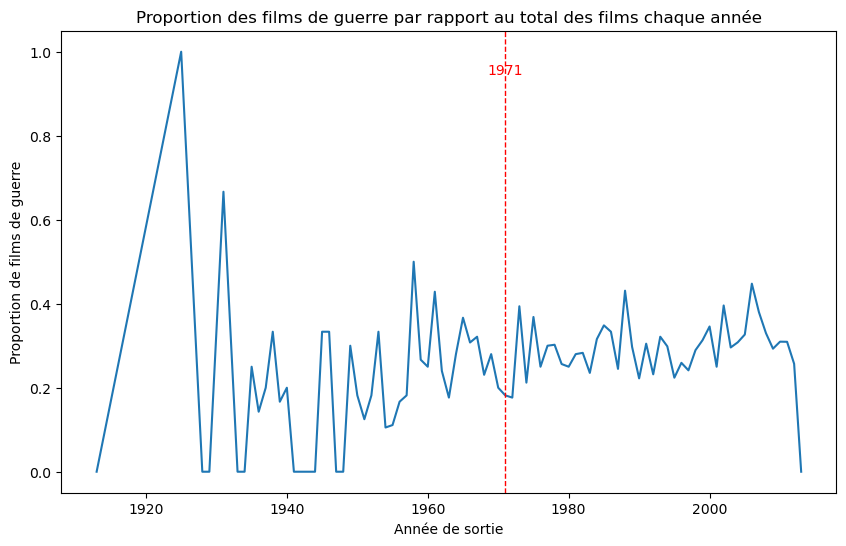

In [80]:
total_movies_per_year = IndianBangal_movies['YearOfRelease'].value_counts().sort_index()

war_movies_per_year = War_movies_Bangladesh_India['YearOfRelease'].value_counts().sort_index()

proportion_war_movies = (war_movies_per_year / total_movies_per_year).fillna(0)

plt.figure(figsize=(10, 6))
proportion_war_movies.plot(kind='line', linestyle='-')
plt.xlabel('Année de sortie')
plt.ylabel('Proportion de films de guerre')
plt.title('Proportion des films de guerre par rapport au total des films chaque année')

plt.axvline(1971, color='red', linestyle='--', linewidth=1)
plt.text(1971, plt.ylim()[1] * 0.9, '1971', color='red', ha='center')

plt.show()

## Terrorism?

In [81]:
Terrorism_events = W_events[W_events['Type of Event'] == 'Terrorism']
Terrorism_events

,Sl. No,Name of Incident,Date,Month,Year,Country,Type of Event,Place Name,Impact,Affected Population,Important Person/Group Responsible,Outcome
8,12,Mumbai Terror Attacks,26,November,2008,India,Terrorism,Mumbai,Highlighted the threat of international terrorism,Citizens of Mumbai,LashkarUnknowneUnknownTaiba,Negative
28,32,Kandahar Hijacking (IC 814),24,December,1999,India,Terrorism,"Kandahar, Afghanistan",Highlighted issues in aviation security and te...,"Passengers, crew","Hijackers, Indian Government",Negative
29,33,2001 Indian Parliament Attack,13,December,2001,India,Terrorism,New Delhi,Led to increased tensions between India and Pa...,Indian political system,"Terrorist groups, Government of India",Negative
86,96,2014 Peshawar School Massacre,16,December,2014,Pakistan,Terrorism,Peshawar,"A terrorist attack on the Army Public School, ...","Students, teachers, families",TehrikUnknowniUnknownTaliban Pakistan,Negative
229,255,Moscow Theater Hostage Crisis,23,October,2002,Russia,Terrorism,Moscow,A deadly siege carried out by Chechen terroris...,"Hostages, terrorists","Chechen terrorists, Russian security forces",Negative
230,256,Beslan School Siege,1,September,2004,Russia,Terrorism,"Beslan, North Ossetia",A terrorist attack resulting in over 330 death...,Beslan residents,"Chechen terrorists, Russian security forces",Negative
273,300,Aum Shinrikyo Tokyo Subway Sarin Attack,20,March,1995,Japan,Terrorism,Tokyo,"A deadly terrorist attack by a doomsday cult, ...","Commuters, general public",Aum Shinrikyo cult,Negative
471,507,Riyadh Compound Bombings,12,May,2003,Saudi Arabia,Terrorism,Riyadh,AlUnknownQaeda attacks targeting expatriates u...,"Expatriates, Saudi citizens",AlUnknownQaeda,Negative
500,536,Laju Ferry Hijacking,31,January,1974,Singapore,Terrorism,Singapore,A pivotal event that highlighted Singapore's v...,Singaporean citizens,"Japanese Red Army, Popular Front for the Liber...",Negative
624,662,September 11 Attacks,11,September,2001,USA,Terrorism,"NY, VA, PA",Led to global War on Terror and significant ch...,"American citizens, global citizens",AlUnknownQaeda,Negative


In [82]:
Terrorism_movies = movie_merged_sub[(movie_merged_sub['PlotSummary'].str.contains(r'Terrorism|Terrorist|terrorism|terrorist', case=False, na=False)) & ~(movie_merged_sub['YearOfRelease'].isna())]

Terrorism_movies

,WikipediaMovieID,FreebaseMovieID,MovieName,ReleaseDate,BoxOfficeRevenue,Runtime,Languages,Countries,Genres,YearOfRelease,PlotSummary
49,261237,/m/01mrrd,The Gods Must Be Crazy,1980,34331783.0,109.0,"{""/m/0x82"": ""Afrikaans Language"", ""/m/02h40lc""...","{""/m/0hzlz"": ""South Africa""}","{""/m/03k9fj"": ""Adventure"", ""/m/03btsm8"": ""Acti...",1980,The film is a collision of three separate stor...
83,273431,/m/01p0lg,Terrorama,2001,NaN,103.0,"{""/m/02bv9"": ""Dutch Language""}","{""/m/059j2"": ""Netherlands""}","{""/m/07s9rl0"": ""Drama"", ""/m/01z4y"": ""Comedy""}",2001,"The film tells the story of six mental cases, ..."
91,19929835,/m/04q6md9,Aftershock: Beyond the Civil War,2007,NaN,NaN,{},"{""/m/09c7w0"": ""United States of America""}","{""/m/0jtdp"": ""Documentary""}",2007,The film is about the harsh period of Reconstr...
102,4300418,/m/0bvx7h,The Hero: Love Story of a Spy,2003-04-11,NaN,182.0,"{""/m/03k50"": ""Hindi Language""}","{""/m/03rk0"": ""India""}","{""/m/01jfsb"": ""Thriller"", ""/m/0cq22f9"": ""Actio...",2003,Arun Sharma is a spy working for RAW . He set...
233,103021,/m/0p_sc,Midnight Express,1978-08-31,35000000.0,121.0,"{""/m/064_8sq"": ""French Language"", ""/m/02h40lc""...","{""/m/09c7w0"": ""United States of America"", ""/m/...","{""/m/01jfsb"": ""Thriller"", ""/m/0hn10"": ""LGBT"", ...",1978,"On October 6, 1970, while on holiday in Istanb..."
...,...,...,...,...,...,...,...,...,...,...,...
81317,29041460,/m/0crrzp8,This smells bad,2007-08-03,NaN,100.0,"{""/m/06nm1"": ""Spanish Language""}","{""/m/01ls2"": ""Colombia""}","{""/m/01jfsb"": ""Thriller"", ""/m/03q4nz"": ""World ...",2007,Ricardo Caicedo is a well-to-do businessman in...
81470,3027347,/m/08ljr5,Blown Away,1994-07-01,30155037.0,120.0,"{""/m/03x42"": ""Irish"", ""/m/02h40lc"": ""English L...","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/03btsm8"": ""Actio...",1994,"Ryan Gaerity , an Irish terrorist, escapes fro..."
81559,19035463,/m/04jm8fm,Vishwavidhaata,1997,NaN,146.0,"{""/m/03k50"": ""Hindi Language""}","{""/m/03rk0"": ""India""}","{""/m/04t36"": ""Musical"", ""/m/07s9rl0"": ""Drama"",...",1997,"Jay Verma lives in Bombay. He is an honest, u..."
81602,2523915,/m/07ktmd,Going Overboard,1989,NaN,97.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America"", ""/m/...","{""/m/01z4y"": ""Comedy"", ""/m/0q00t"": ""Stand-up c...",1989,Shecky Moskowitz is a struggling young comedi...


In [83]:
pd.DataFrame(Terrorism_movies['YearOfRelease'].value_counts())

,count
YearOfRelease,
2008,41
2010,39
2006,37
2009,37
2007,30
2005,29
2002,26
2004,24
2003,18


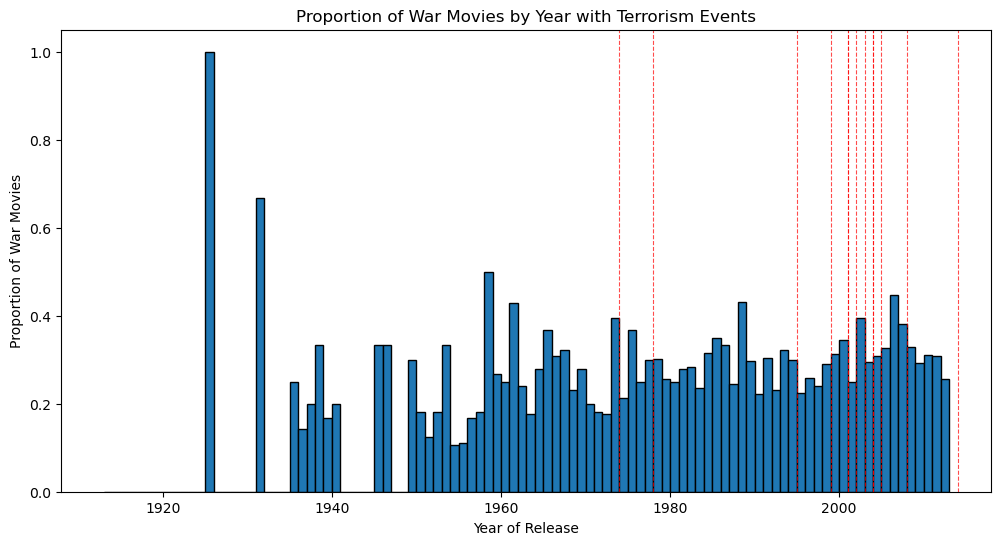

In [84]:
total_movies_per_year = movie_merged_sub['YearOfRelease'].value_counts().sort_index()

terr_movies_per_year = Terrorism_movies['YearOfRelease'].value_counts().sort_index()

proportion_terr_movies = (terr_movies_per_year / total_movies_per_year).fillna(0)

plt.figure(figsize=(12, 6))
plt.hist(proportion_war_movies.index, weights=proportion_war_movies.values, bins=100, edgecolor='black')
plt.xlabel('Year of Release')
plt.ylabel('Proportion of War Movies')
plt.title('Proportion of War Movies by Year with Terrorism Events')


for year in Terrorism_events['Year']:
    plt.axvline(year, color='red', linestyle='--', linewidth=0.8, alpha=0.7)


plt.show()

Let's try to see before and after a specific event\\
Code pas au point

In [85]:
print(Terrorism_events['Year'][624])

2001


In [86]:
import statsmodels.api as sm
from scipy.stats import ttest_ind, mannwhitneyu
import numpy as np
help (ttest_ind)

Help on function ttest_ind in module scipy.stats._stats_py:

ttest_ind(a, b, axis=0, equal_var=True, nan_policy='propagate', permutations=None, random_state=None, alternative='two-sided', trim=0, *, keepdims=False)
    Calculate the T-test for the means of *two independent* samples of scores.
    
    This is a test for the null hypothesis that 2 independent samples
    have identical average (expected) values. This test assumes that the
    populations have identical variances by default.
    
    Parameters
    ----------
    a, b : array_like
        The arrays must have the same shape, except in the dimension
        corresponding to `axis` (the first, by default).
    axis : int or None, default: 0
        If an int, the axis of the input along which to compute the statistic.
        The statistic of each axis-slice (e.g. row) of the input will appear in a
        corresponding element of the output.
        If ``None``, the input will be raveled before computing the statistic.
  

In [87]:
import statsmodels.api as sm
from scipy.stats import ttest_ind, mannwhitneyu
import numpy as np

momo = Terrorism_events['Year'][624]
Terrorism_movies.loc[:, 'YearOfRelease'] = Terrorism_movies['YearOfRelease'].astype(int)

movies= pd.DataFrame(Terrorism_movies['YearOfRelease'].value_counts())

In [88]:


# Filtrer les films 5 ans avant et 5 ans après 2001
movies_before = Terrorism_movies[Terrorism_movies['YearOfRelease'] <= momo]['YearOfRelease']
movies_after = Terrorism_movies[Terrorism_movies['YearOfRelease'] >= momo]['YearOfRelease']
# Calculer le nombre de films avant et après
count_before = pd.DataFrame(movies_before.value_counts())
count_after = pd.DataFrame(movies_after.value_counts())


In [89]:
count_after

,count
YearOfRelease,
2008,41
2010,39
2006,37
2009,37
2007,30
2005,29
2002,26
2004,24
2003,18


In [90]:
count_before

,count
YearOfRelease,
1994,18
1997,17
2001,15
1998,14
1999,14
2000,13
1996,13
1995,12
1992,9


In [91]:

# Test t de Student et Test de Mann-Whitney U
t_stat, t_p_value = ttest_ind(count_before['count'], count_after['count'])
u_stat, u_p_value = mannwhitneyu(count_before['count'], count_after['count'])

print(t_stat, t_p_value, u_stat, u_p_value )



-10.76766532418306 2.9272275821270507e-15 8.5 2.3803695836252574e-07


In [92]:

# Ajouter une variable indicatrice binaire 'After2001' pour l'analyse de régression
Terrorism_movies['After2001'] = np.where(Terrorism_movies['YearOfRelease'] >= momo, 1, 0)

# Définir la variable indépendante (constante et 'After2001') et la variable dépendante (YearOfRelease)
X = sm.add_constant(Terrorism_movies['After2001'])
y = Terrorism_movies['YearOfRelease'] #### IS NOT MATCHING



C:\Users\HP\AppData\Local\Temp\ipykernel_7544\1990830151.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Terrorism_movies['After2001'] = np.where(Terrorism_movies['YearOfRelease'] >= momo, 1, 0)



model = sm.OLS(y, X).fit()
regression_summary = model.summary()

print(f"Nombre de films 5 ans avant 2001 : {count_before.sum()}")
print(f"Nombre de films 5 ans après 2001 : {count_after.sum()}")
print(f"Test t de Student - Statistique t : {t_stat}, Valeur p : {t_p_value}")
print(f"Test de Mann-Whitney U - Statistique U : {u_stat}, Valeur p : {u_p_value}")
print("\nRésumé de la régression :")
print(regression_summary)

## PREMIERE IDEE

In [93]:
metacritic = pd.read_csv('./data/metacritic/movies.csv', sep=',')
metacritic

,id,metascore,rating,release_date,sort_no,summary,title,user_score
0,549123,94,TV-14,"July 26, 1989",101,A young boy and his little sister struggle to ...,Grave of the Fireflies (1988),8.9
1,522228,94,PG-13,"December 8, 2000",102,"In 19th century China, a magical sword given b...","Crouching Tiger, Hidden Dragon",8.2
2,550614,94,G,"September 11, 1970",103,"In a French forest in 1798, a child is found w...",The Wild Child,6.5
3,549303,94,TV-PG,"January 15, 1943",104,A young woman discovers her visiting uncle may...,Shadow of a Doubt,8.2
4,539956,94,PG,"June 19, 2015",105,"Growing up can be a bumpy road, and it’s no ex...",Inside Out,8.7
...,...,...,...,...,...,...,...,...
15320,550890,1,PG,"August 22, 1987",15321,Dodger must confront the struggles of life as ...,The Garbage Pail Kids Movie,0.7
15321,544030,1,Not Rated,"June 5, 2015",15322,"Three men—Jules Rimet (Gérard Depardieu), Joao...",United Passions,0.7
15322,522425,1,PG-13,"January 12, 1996",15323,Five brave scientists are forced to face life ...,Bio-Dome,7.5
15323,517421,1,Not Rated,"August 12, 2005",15324,Quite definitely one of the most brutal displa...,Chaos,2.5


In [94]:
for col in metacritic.columns :
    print ('the column', col,  'contains ', metacritic[col].isna().sum()/len(metacritic[col]), 'Nan')
    if (col == 'rating') or (col == 'metascore') or (col == 'user_score') :
        print ('it takes the values', metacritic[col].value_counts(), '\n')
    print ('\n\n')

the column id contains  0.0 Nan



the column metascore contains  0.0 Nan
it takes the values metascore
64    370
65    367
66    366
68    360
72    351
     ... 
10      5
8       5
5       3
6       2
2       1
Name: count, Length: 98, dtype: int64 




the column rating contains  0.0733442088091354 Nan
it takes the values rating
R            4938
Not Rated    3429
PG-13        2580
PG           1472
Unrated       442
TV-MA         260
G             230
NR            154
TV-14         149
TV-PG         140
Approved      134
Passed         94
NC-17          60
TV-G           40
X              23
GP             23
M               9
M/PG            8
Open            6
PG--13          5
TV-Y7           2
MA-17           1
PG-13`          1
TV-Y7-FV        1
Name: count, dtype: int64 




the column release_date contains  0.0 Nan



the column sort_no contains  0.0 Nan



the column summary contains  0.00019575856443719412 Nan



the column title contains  0.0 Nan



the column user_scor

In [95]:
moviecritic_merged = pd.merge(movie_metadata, metacritic, left_on= 'MovieName', right_on='title', how='left')
moviecritic_merged

,WikipediaMovieID,FreebaseMovieID,MovieName,ReleaseDate,BoxOfficeRevenue,Runtime,Languages,Countries,Genres,YearOfRelease,id,metascore,rating,release_date,sort_no,summary,title,user_score
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2001,520600.0,35.0,R,"August 24, 2001",13854.0,A harrowing tale of rescue and escape from a c...,Ghosts of Mars,7.7
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...",2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D...",1988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic...",1987,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}",1983,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82898,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011-03-19,NaN,120.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/07s9rl0"": ""Drama""}",2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82899,34980460,/m/0g4pl34,Knuckle,2011-01-21,NaN,96.0,"{""/m/02h40lc"": ""English Language""}","{""/m/03rt9"": ""Ireland"", ""/m/07ssc"": ""United Ki...","{""/m/03bxz7"": ""Biographical film"", ""/m/07s9rl0...",2011,539870.0,65.0,R,"December 2, 2011",6329.0,An epic 12-year journey into in the world of a...,Knuckle,7.4
82900,9971909,/m/02pygw1,Another Nice Mess,1972-09-22,NaN,66.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06nbt"": ""Satire"", ""/m/01z4y"": ""Comedy""}",1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82901,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,150.0,"{""/m/03_9r"": ""Japanese Language""}","{""/m/03_3d"": ""Japan""}","{""/m/06n90"": ""Science Fiction"", ""/m/0gw5n2f"": ...",1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [96]:
1 - (moviecritic_merged['user_score'].isna().sum()/len(moviecritic_merged['user_score']))


0.14432529582765397

In [97]:
moviecritic_merged['metascore'].isna().sum()/len(moviecritic_merged['user_score'])


0.855674704172346

In [98]:
moviecritic_merged['sort_no'].isna().sum()/len(moviecritic_merged['user_score'])

0.855674704172346

Let's see what movies do we have in common with our dataset. We will merge by title.

In [99]:
import re
def matching_titles(movie, critic):
    critic['WikipediaMovieID'] = np.nan

    for _, movie_row in movie.iterrows():
        movie_str = re.escape("".join(movie_row['MovieName'].split()))
        
        # Check if 'title' in critic contains the modified 'MovieName' and assign 'WikipediaMovieID' if there's a match
        critic.loc[critic['title'].str.contains(movie_str, case=False, na=False), 'WikipediaMovieID'] = movie_row['WikipediaMovieID']

    return critic

In [100]:
matching_titles(movie_metadata,metacritic)

,id,metascore,rating,release_date,sort_no,summary,title,user_score,WikipediaMovieID
0,549123,94,TV-14,"July 26, 1989",101,A young boy and his little sister struggle to ...,Grave of the Fireflies (1988),8.9,1788713.0
1,522228,94,PG-13,"December 8, 2000",102,"In 19th century China, a magical sword given b...","Crouching Tiger, Hidden Dragon",8.2,31006392.0
2,550614,94,G,"September 11, 1970",103,"In a French forest in 1798, a child is found w...",The Wild Child,6.5,35587718.0
3,549303,94,TV-PG,"January 15, 1943",104,A young woman discovers her visiting uncle may...,Shadow of a Doubt,8.2,23488527.0
4,539956,94,PG,"June 19, 2015",105,"Growing up can be a bumpy road, and it’s no ex...",Inside Out,8.7,20733616.0
...,...,...,...,...,...,...,...,...,...
15320,550890,1,PG,"August 22, 1987",15321,Dodger must confront the struggles of life as ...,The Garbage Pail Kids Movie,0.7,25969438.0
15321,544030,1,Not Rated,"June 5, 2015",15322,"Three men—Jules Rimet (Gérard Depardieu), Joao...",United Passions,0.7,685938.0
15322,522425,1,PG-13,"January 12, 1996",15323,Five brave scientists are forced to face life ...,Bio-Dome,7.5,18803418.0
15323,517421,1,Not Rated,"August 12, 2005",15324,Quite definitely one of the most brutal displa...,Chaos,2.5,23488527.0


In [101]:
matched = matching_titles(movie_metadata, metacritic)

# trop long, a voir comment run

In [102]:
moviecritic_merged2 = pd.merge(movie_metadata, matched, on = 'WikipediaMovieID',  how='left')
moviecritic_merged2

,WikipediaMovieID,FreebaseMovieID,MovieName,ReleaseDate,BoxOfficeRevenue,Runtime,Languages,Countries,Genres,YearOfRelease,id,metascore,rating,release_date,sort_no,summary,title,user_score
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...",2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D...",1988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic...",1987,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}",1983,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95961,34980460,/m/0g4pl34,Knuckle,2011-01-21,NaN,96.0,"{""/m/02h40lc"": ""English Language""}","{""/m/03rt9"": ""Ireland"", ""/m/07ssc"": ""United Ki...","{""/m/03bxz7"": ""Biographical film"", ""/m/07s9rl0...",2011,539870.0,65.0,R,"December 2, 2011",6329.0,An epic 12-year journey into in the world of a...,Knuckle,7.4
95962,34980460,/m/0g4pl34,Knuckle,2011-01-21,NaN,96.0,"{""/m/02h40lc"": ""English Language""}","{""/m/03rt9"": ""Ireland"", ""/m/07ssc"": ""United Ki...","{""/m/03bxz7"": ""Biographical film"", ""/m/07s9rl0...",2011,538826.0,24.0,PG-13,"October 8, 2010",14937.0,When overgrown orphan Walter accidentally burn...,Knucklehead,tbd
95963,9971909,/m/02pygw1,Another Nice Mess,1972-09-22,NaN,66.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06nbt"": ""Satire"", ""/m/01z4y"": ""Comedy""}",1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95964,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,150.0,"{""/m/03_9r"": ""Japanese Language""}","{""/m/03_3d"": ""Japan""}","{""/m/06n90"": ""Science Fiction"", ""/m/0gw5n2f"": ...",1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [103]:
1 - (moviecritic_merged2['user_score'].isna().sum()/len(moviecritic_merged2['user_score']))


0.15962945209761792

LETS TRY MINISCULE

In [118]:
import re
def matching_titles_l(movie, critic):
    critic['WikipediaMovieID'] = np.nan

    for _, movie_row in movie.iterrows():
        movie_str = re.escape("".join(movie_row['MovieName'].lower().split()))
        
        # Check if 'title' in critic contains the modified 'MovieName' and assign 'WikipediaMovieID' if there's a match
        critic.loc[critic['lowtitle'].str.contains(movie_str, case=False, na=False), 'WikipediaMovieID'] = movie_row['WikipediaMovieID']

    return critic

In [119]:
metacritic['lowtitle'] = metacritic['title'].str.lower()


In [121]:
matched_l = matching_titles_l(movie_metadata, metacritic)


In [ ]:
moviecritic_merged3 = pd.merge(movie_metadata, matched_l, on = 'WikipediaMovieID',  how='left')


In [124]:
1 - (moviecritic_merged3['user_score'].isnull().sum()/len(moviecritic_merged3['user_score']))


0.15962945209761792

In [ ]:
## ne marche pas
def matching_titles(movie, critic):
    for index1, row in critic.iterrows():
        for index2, row in movie.iterrows():
            movie_str = movie[index2]['MovieName']
            if critic[index1]['title'].str.contains("".join(movie_str.split())):
                critic[index1]['matching']=movie[index2]['WikipediaMovieID']
            else :
                criticc[index1]['matching']= np.nan
   

---
## Lylia's part

---
## Ali's part

---
## Christian's part

---
## Yassin's part